<table class="ee-notebook-buttons" align="center">
    <td><a target="_blank"  href="https://colab.research.google.com/github/ytarazona/scikit-eo/blob/main/examples/12_Plot_an_satellite_image_in_RGB.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
</table>

# **_<div class="alert alert-success"><font color='darkred'> Tutorials: 12 Plot an satellite image in RGB</font></div>_**

# 1.0 Libraries

To install ```scikit-eo``` and ```rasterio``` you can do it with the following line:

In [ ]:
!pip install scikeo rasterio

Libraries to be used:

In [ ]:
import rasterio
import numpy as np
from scikeo.plot import plotRGB
import matplotlib.pyplot as plt

Connecting to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 2.0 Optical image

Landsat-8 OLI (Operational Land Imager) will be used. This image, which is in surface reflectance, contain bands:
- Blue -> B2
- Green -> B3 
- Red -> B4
- Nir -> B5
- Swir1 -> B6
- Swir2 -> B7

The image to be used can be downloaded [here](https://drive.google.com/drive/folders/1uMu1x-roQtBagbLUmGB9-C9OUHWIzPUb?usp=sharing):

## 3.0 Plot in RGB using the ```plotRGB()``` function

The image:

In [ ]:
path_raster = "/content/drive/MyDrive/scikit-eo_data/12_plotRGB/LC08_232066_20190727_SR.tif"
img = rasterio.open(path_raster)

converting to array:

In [ ]:
# Preparing the image
arr = np.moveaxis(img.read(), 0, -1)

script to normalize the image before using the ```imshow()``` function:

In [ ]:
# Apilamos nuestras bands en un STACK
rgb = np.dstack([arr[:, :, 4], arr[:, :, 3], arr[:, :, 2]])

# Normalizing the bands
def normalize(arr):
    img = (arr - np.min(arr))/(np.max(arr) - np.min(arr))
    return img

rgb_norm = normalize(rgb)

Applying the ```plotRGB``` algorithm is easy:

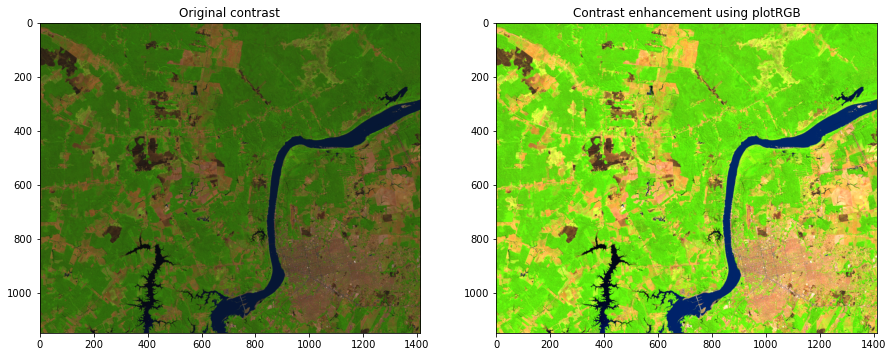

In [ ]:
# Let´s plot
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 9))

# imagen without contrast
axes[0].imshow(rgb_norm)
axes[0].set_title("Original contrast")
axes[0].grid(False)

# image with contrast
plotRGB(img, title = 'Contrast enhancement using plotRGB', ax = axes[1])
plt.show()